In [1]:
from google.colab import files
uploaded = files.upload()


Saving IMDb Movies India.csv to IMDb Movies India (3).csv


In [2]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("adrianmcmahon/imdb-india-movies")

# Construct the full path to the CSV file
csv_file_path = os.path.join(path, "IMDb Movies India.csv")

# Read the CSV file into a pandas DataFrame, specifying an encoding to handle potential UnicodeDecodeError
data = pd.read_csv(csv_file_path, encoding='latin1')

print("Path to dataset files:", path)
print("Dataset shape:", data.shape)
data.head()

Using Colab cache for faster access to the 'imdb-india-movies' dataset.
Path to dataset files: /kaggle/input/imdb-india-movies
Dataset shape: (15509, 10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [7]:
# Step 2: Load dataset
# Replace the file name with your actual uploaded file name
data = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin1')

# Display first few rows
print("Dataset shape:", data.shape)
data.head()

Dataset shape: (15509, 10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
# Step 3: Basic information about the dataset
data.info()

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Summary statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB

Missing values in each column:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [10]:
# Step 4: Select features relevant to our prediction task
# (Adjust based on the actual column names in your dataset)
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'

# Create a working copy
df = data[features + [target]].copy()

# Drop rows with missing target values
df.dropna(subset=[target], inplace=True)

print("Data after selecting features and target:")
print(df.head())

Data after selecting features and target:
                       Genre        Director          Actor 1  \
1                      Drama   Gaurav Bakshi     Rasika Dugal   
3            Comedy, Romance      Ovais Khan          Prateik   
5     Comedy, Drama, Musical    Rahul Rawail       Bobby Deol   
6        Drama, Romance, War  Shoojit Sircar  Jimmy Sheirgill   
8  Horror, Mystery, Thriller   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  Rating  
1          Vivek Ghamande    Arvind Jangid     7.0  
3              Ishita Raj  Siddhant Kapoor     4.4  
5  Aishwarya Rai Bachchan    Shammi Kapoor     4.7  
6          Minissha Lamba   Yashpal Sharma     7.4  
8          Muntazir Ahmad     Kiran Bhatia     5.6  


In [20]:
# Step 5: Fill missing categorical values with 'Unknown'
df = df.fillna('Unknown')

# Encode categorical features using LabelEncoder
# Store separate encoders for each column
label_encoders = {}
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

print("After encoding categorical features:")
print(df.head())

After encoding categorical features:
   Genre  Director  Actor 1  Actor 2  Actor 3  Rating
1    268       811     1782     2815      377     7.0
3    207      1749     1589      890     2572     4.4
5    177      2005      508       85     2449     4.7
6    331      2643      931     1388     3030     7.4
8    367       174     2521     1461     1205     5.6


In [14]:
# Step 6: Define features (X) and target (y)
X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = df[target]

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (6335, 5)
Test set size: (1584, 5)


In [15]:
# Step 7: Train Linear Regression and Random Forest models

# --- Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# --- Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [16]:
# Step 8: Evaluate models using Mean Squared Error and R² Score

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"  Mean Squared Error: {mse:.3f}")
    print(f"  R² Score: {r2:.3f}")
    print("-" * 40)

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


Linear Regression Performance:
  Mean Squared Error: 1.793
  R² Score: 0.035
----------------------------------------
Random Forest Regressor Performance:
  Mean Squared Error: 1.648
  R² Score: 0.114
----------------------------------------


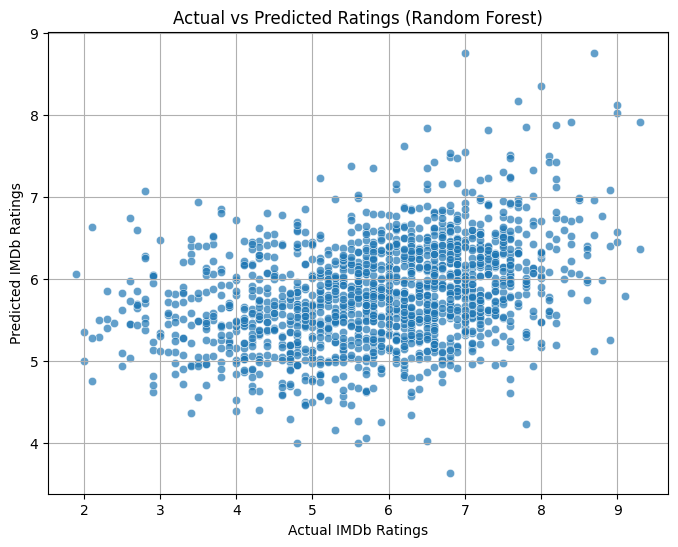

In [17]:
# Step 9: Visualize model performance

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7)
plt.xlabel("Actual IMDb Ratings")
plt.ylabel("Predicted IMDb Ratings")
plt.title("Actual vs Predicted Ratings (Random Forest)")
plt.grid(True)
plt.show()


In [23]:
# Step 10: Save the best performing model
joblib.dump(rf_model, "imdb_india_movie_rating_model.pkl")
print("✅ Model saved as 'imdb_india_movie_rating_model.pkl'")


✅ Model saved as 'imdb_india_movie_rating_model.pkl'
